In [26]:
'''
Author: ChenHJ
Date: 2022-11-01 17:06:46
LastEditors: ChenHJ
LastEditTime: 2022-11-01 17:07:01
FilePath: /chenhj/0302code/obs_divide_SASMR_plot.ipynb
Aim: 
Mission: 
'''
from mailbox import _PartialFile
import numpy as np
import xarray as xr
import os
import re
from cdo import Cdo
import shutil
import sys

sys.path.append("/home/ys17-23/chenhj/self_def/")
import plot as sepl
import cal as ca
import pandas as pd
from importlib import reload

import metpy.calc as mpcalc
import metpy.constants as constants
import geocat.comp
from windspharm.xarray import VectorWind
import skill_metrics as sm
from brokenaxes import brokenaxes

reload(sepl)

# sd.path.append("/home/ys17-23/chenhj/1201code/self_def.py")

cdo = Cdo()

# for plot
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter
from cartopy.mpl.ticker import LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy import signal
from eofs.multivariate.standard import MultivariateEof
from eofs.standard import Eof
from matplotlib.transforms import blended_transform_factory

### 印度降水分区

In [3]:
nIndia_N = 32.5
nIndia_S = 20.0
nIndia_W = 70.0
nIndia_E = 85.0

sIndia_N = 20.0
sIndia_S = 7.5
sIndia_W = 70.0
sIndia_E = 85.0

India_N = 32.5
India_S = 7.5
India_W = 70.0
India_E = 85.0

In [4]:
NC_N = 40.0
NC_S = 32.5
NC_W = 105.0
NC_E = 120.0

## 读取回归计算得到的数据（GPCP）

In [8]:
nIndR_GPCP_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_GPCP_pre_regress.nc")
nIndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_hgt_regress.nc")
nIndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_u_regress.nc")
nIndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_v_regress.nc")
nIndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_wDJF_regress.nc")
nIndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_wMAM_regress.nc")
nIndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_wJJA_regress.nc")
nIndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_wSON_regress.nc")
nIndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_wnDJF_regress.nc")
nIndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_div_regress.nc")

sIndR_GPCP_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_GPCP_pre_regress.nc")
sIndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_hgt_regress.nc")
sIndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_u_regress.nc")
sIndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_v_regress.nc")
sIndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_wDJF_regress.nc")
sIndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_wMAM_regress.nc")
sIndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_wJJA_regress.nc")
sIndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_wSON_regress.nc")
sIndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_wnDJF_regress.nc")
sIndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_div_regress.nc")

nIndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_sstDJF_regress.nc")
nIndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_sstMAM_regress.nc")
nIndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_sstJJA_regress.nc")
nIndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_sstSON_regress.nc")
nIndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_sstnDJF_regress.nc")

sIndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_sstDJF_regress.nc")
sIndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_sstMAM_regress.nc")
sIndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_sstJJA_regress.nc")
sIndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_sstSON_regress.nc")
sIndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_sstnDJF_regress.nc")

nIndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_uq_regress.nc")
nIndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_vq_regress.nc")
nIndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/GPCP/detrend/nIndR_ERA5_uqvqdiv_regress.nc")

sIndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_uq_regress.nc")
sIndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_vq_regress.nc")
sIndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/GPCP/detrend/sIndR_ERA5_uqvqdiv_regress.nc")

IndR_GPCP_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_GPCP_pre_regress.nc")
IndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_hgt_regress.nc")
IndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_u_regress.nc")
IndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_v_regress.nc")
IndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_wDJF_regress.nc")
IndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_wMAM_regress.nc")
IndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_wJJA_regress.nc")
IndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_wSON_regress.nc")
IndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_wnDJF_regress.nc")
IndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_div_regress.nc")

IndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_sstDJF_regress.nc")
IndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_sstMAM_regress.nc")
IndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_sstJJA_regress.nc")
IndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_sstSON_regress.nc")
IndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_sstnDJF_regress.nc")

IndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uq_regress.nc")
IndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vq_regress.nc")
IndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uqvqdiv_regress.nc")

IndR_ERA5_uDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uDJF_regress.nc")
IndR_ERA5_uMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uMAM_regress.nc")
IndR_ERA5_uJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uJJA_regress.nc")
IndR_ERA5_uSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_uSON_regress.nc")
IndR_ERA5_unDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_unDJF_regress.nc")


IndR_ERA5_vDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vDJF_regress.nc")
IndR_ERA5_vMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vMAM_regress.nc")
IndR_ERA5_vJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vJJA_regress.nc")
IndR_ERA5_vSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vSON_regress.nc")
IndR_ERA5_vnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_vnDJF_regress.nc")

In [5]:
nIndR_GPCP_pre_slope = nIndR_GPCP_pre_regress["slope"]
nIndR_GPCP_pre_rvalue = nIndR_GPCP_pre_regress["rvalue"]
nIndR_GPCP_pre_pvalue = nIndR_GPCP_pre_regress["pvalue"]

nIndR_ERA5_hgt_slope = nIndR_ERA5_hgt_regress["slope"]
nIndR_ERA5_hgt_rvalue = nIndR_ERA5_hgt_regress["rvalue"]
nIndR_ERA5_hgt_pvalue = nIndR_ERA5_hgt_regress["pvalue"]

nIndR_ERA5_u_slope = nIndR_ERA5_u_regress["slope"]
nIndR_ERA5_u_rvalue = nIndR_ERA5_u_regress["rvalue"]
nIndR_ERA5_u_pvalue = nIndR_ERA5_u_regress["pvalue"]

nIndR_ERA5_v_slope = nIndR_ERA5_v_regress["slope"]
nIndR_ERA5_v_rvalue = nIndR_ERA5_v_regress["rvalue"]
nIndR_ERA5_v_pvalue = nIndR_ERA5_v_regress["pvalue"]

nIndR_ERA5_wDJF_slope = nIndR_ERA5_wDJF_regress["slope"]
nIndR_ERA5_wDJF_rvalue = nIndR_ERA5_wDJF_regress["rvalue"]
nIndR_ERA5_wDJF_pvalue = nIndR_ERA5_wDJF_regress["pvalue"]

nIndR_ERA5_wMAM_slope = nIndR_ERA5_wMAM_regress["slope"]
nIndR_ERA5_wMAM_rvalue = nIndR_ERA5_wMAM_regress["rvalue"]
nIndR_ERA5_wMAM_pvalue = nIndR_ERA5_wMAM_regress["pvalue"]

nIndR_ERA5_wJJA_slope = nIndR_ERA5_wJJA_regress["slope"]
nIndR_ERA5_wJJA_rvalue = nIndR_ERA5_wJJA_regress["rvalue"]
nIndR_ERA5_wJJA_pvalue = nIndR_ERA5_wJJA_regress["pvalue"]

nIndR_ERA5_wSON_slope = nIndR_ERA5_wSON_regress["slope"]
nIndR_ERA5_wSON_rvalue = nIndR_ERA5_wSON_regress["rvalue"]
nIndR_ERA5_wSON_pvalue = nIndR_ERA5_wSON_regress["pvalue"]

nIndR_ERA5_wnDJF_slope = nIndR_ERA5_wnDJF_regress["slope"]
nIndR_ERA5_wnDJF_rvalue = nIndR_ERA5_wnDJF_regress["rvalue"]
nIndR_ERA5_wnDJF_pvalue = nIndR_ERA5_wnDJF_regress["pvalue"]

nIndR_ERA5_div_slope = nIndR_ERA5_div_regress["slope"]
nIndR_ERA5_div_rvalue = nIndR_ERA5_div_regress["rvalue"]
nIndR_ERA5_div_pvalue = nIndR_ERA5_div_regress["pvalue"]

nIndR_ERA5_sstDJF_slope = nIndR_ERA5_sstDJF_regress["slope"]
nIndR_ERA5_sstDJF_rvalue = nIndR_ERA5_sstDJF_regress["rvalue"]
nIndR_ERA5_sstDJF_pvalue = nIndR_ERA5_sstDJF_regress["pvalue"]

nIndR_ERA5_sstMAM_slope = nIndR_ERA5_sstMAM_regress["slope"]
nIndR_ERA5_sstMAM_rvalue = nIndR_ERA5_sstMAM_regress["rvalue"]
nIndR_ERA5_sstMAM_pvalue = nIndR_ERA5_sstMAM_regress["pvalue"]

nIndR_ERA5_sstJJA_slope = nIndR_ERA5_sstJJA_regress["slope"]
nIndR_ERA5_sstJJA_rvalue = nIndR_ERA5_sstJJA_regress["rvalue"]
nIndR_ERA5_sstJJA_pvalue = nIndR_ERA5_sstJJA_regress["pvalue"]

nIndR_ERA5_sstSON_slope = nIndR_ERA5_sstSON_regress["slope"]
nIndR_ERA5_sstSON_rvalue = nIndR_ERA5_sstSON_regress["rvalue"]
nIndR_ERA5_sstSON_pvalue = nIndR_ERA5_sstSON_regress["pvalue"]

nIndR_ERA5_sstnDJF_slope = nIndR_ERA5_sstnDJF_regress["slope"]
nIndR_ERA5_sstnDJF_rvalue = nIndR_ERA5_sstnDJF_regress["rvalue"]
nIndR_ERA5_sstnDJF_pvalue = nIndR_ERA5_sstnDJF_regress["pvalue"]

nIndR_ERA5_uq_slope = nIndR_ERA5_uq_regress["slope"]
nIndR_ERA5_uq_rvalue = nIndR_ERA5_uq_regress["rvalue"]
nIndR_ERA5_uq_pvalue = nIndR_ERA5_uq_regress["pvalue"]

nIndR_ERA5_vq_slope = nIndR_ERA5_vq_regress["slope"]
nIndR_ERA5_vq_rvalue = nIndR_ERA5_vq_regress["rvalue"]
nIndR_ERA5_vq_pvalue = nIndR_ERA5_vq_regress["pvalue"]

nIndR_ERA5_uqvqdiv_slope = nIndR_ERA5_uqvqdiv_regress["slope"]
nIndR_ERA5_uqvqdiv_rvalue = nIndR_ERA5_uqvqdiv_regress["rvalue"]
nIndR_ERA5_uqvqdiv_pvalue = nIndR_ERA5_uqvqdiv_regress["pvalue"]

In [6]:
sIndR_GPCP_pre_slope = sIndR_GPCP_pre_regress["slope"]
sIndR_GPCP_pre_rvalue = sIndR_GPCP_pre_regress["rvalue"]
sIndR_GPCP_pre_pvalue = sIndR_GPCP_pre_regress["pvalue"]

sIndR_ERA5_hgt_slope = sIndR_ERA5_hgt_regress["slope"]
sIndR_ERA5_hgt_rvalue = sIndR_ERA5_hgt_regress["rvalue"]
sIndR_ERA5_hgt_pvalue = sIndR_ERA5_hgt_regress["pvalue"]

sIndR_ERA5_u_slope = sIndR_ERA5_u_regress["slope"]
sIndR_ERA5_u_rvalue = sIndR_ERA5_u_regress["rvalue"]
sIndR_ERA5_u_pvalue = sIndR_ERA5_u_regress["pvalue"]

sIndR_ERA5_v_slope = sIndR_ERA5_v_regress["slope"]
sIndR_ERA5_v_rvalue = sIndR_ERA5_v_regress["rvalue"]
sIndR_ERA5_v_pvalue = sIndR_ERA5_v_regress["pvalue"]

sIndR_ERA5_wDJF_slope = sIndR_ERA5_wDJF_regress["slope"]
sIndR_ERA5_wDJF_rvalue = sIndR_ERA5_wDJF_regress["rvalue"]
sIndR_ERA5_wDJF_pvalue = sIndR_ERA5_wDJF_regress["pvalue"]

sIndR_ERA5_wMAM_slope = sIndR_ERA5_wMAM_regress["slope"]
sIndR_ERA5_wMAM_rvalue = sIndR_ERA5_wMAM_regress["rvalue"]
sIndR_ERA5_wMAM_pvalue = sIndR_ERA5_wMAM_regress["pvalue"]

sIndR_ERA5_wJJA_slope = sIndR_ERA5_wJJA_regress["slope"]
sIndR_ERA5_wJJA_rvalue = sIndR_ERA5_wJJA_regress["rvalue"]
sIndR_ERA5_wJJA_pvalue = sIndR_ERA5_wJJA_regress["pvalue"]

sIndR_ERA5_wSON_slope = sIndR_ERA5_wSON_regress["slope"]
sIndR_ERA5_wSON_rvalue = sIndR_ERA5_wSON_regress["rvalue"]
sIndR_ERA5_wSON_pvalue = sIndR_ERA5_wSON_regress["pvalue"]

sIndR_ERA5_wnDJF_slope = sIndR_ERA5_wnDJF_regress["slope"]
sIndR_ERA5_wnDJF_rvalue = sIndR_ERA5_wnDJF_regress["rvalue"]
sIndR_ERA5_wnDJF_pvalue = sIndR_ERA5_wnDJF_regress["pvalue"]

sIndR_ERA5_div_slope = sIndR_ERA5_div_regress["slope"]
sIndR_ERA5_div_rvalue = sIndR_ERA5_div_regress["rvalue"]
sIndR_ERA5_div_pvalue = sIndR_ERA5_div_regress["pvalue"]

sIndR_ERA5_sstDJF_slope = sIndR_ERA5_sstDJF_regress["slope"]
sIndR_ERA5_sstDJF_rvalue = sIndR_ERA5_sstDJF_regress["rvalue"]
sIndR_ERA5_sstDJF_pvalue = sIndR_ERA5_sstDJF_regress["pvalue"]

sIndR_ERA5_sstMAM_slope = sIndR_ERA5_sstMAM_regress["slope"]
sIndR_ERA5_sstMAM_rvalue = sIndR_ERA5_sstMAM_regress["rvalue"]
sIndR_ERA5_sstMAM_pvalue = sIndR_ERA5_sstMAM_regress["pvalue"]

sIndR_ERA5_sstJJA_slope = sIndR_ERA5_sstJJA_regress["slope"]
sIndR_ERA5_sstJJA_rvalue = sIndR_ERA5_sstJJA_regress["rvalue"]
sIndR_ERA5_sstJJA_pvalue = sIndR_ERA5_sstJJA_regress["pvalue"]

sIndR_ERA5_sstSON_slope = sIndR_ERA5_sstSON_regress["slope"]
sIndR_ERA5_sstSON_rvalue = sIndR_ERA5_sstSON_regress["rvalue"]
sIndR_ERA5_sstSON_pvalue = sIndR_ERA5_sstSON_regress["pvalue"]

sIndR_ERA5_sstnDJF_slope = sIndR_ERA5_sstnDJF_regress["slope"]
sIndR_ERA5_sstnDJF_rvalue = sIndR_ERA5_sstnDJF_regress["rvalue"]
sIndR_ERA5_sstnDJF_pvalue = sIndR_ERA5_sstnDJF_regress["pvalue"]

sIndR_ERA5_uq_slope = sIndR_ERA5_uq_regress["slope"]
sIndR_ERA5_uq_rvalue = sIndR_ERA5_uq_regress["rvalue"]
sIndR_ERA5_uq_pvalue = sIndR_ERA5_uq_regress["pvalue"]

sIndR_ERA5_vq_slope = sIndR_ERA5_vq_regress["slope"]
sIndR_ERA5_vq_rvalue = sIndR_ERA5_vq_regress["rvalue"]
sIndR_ERA5_vq_pvalue = sIndR_ERA5_vq_regress["pvalue"]

sIndR_ERA5_uqvqdiv_slope = sIndR_ERA5_uqvqdiv_regress["slope"]
sIndR_ERA5_uqvqdiv_rvalue = sIndR_ERA5_uqvqdiv_regress["rvalue"]
sIndR_ERA5_uqvqdiv_pvalue = sIndR_ERA5_uqvqdiv_regress["pvalue"]

In [9]:
IndR_GPCP_pre_slope = IndR_GPCP_pre_regress["slope"]
IndR_GPCP_pre_rvalue = IndR_GPCP_pre_regress["rvalue"]
IndR_GPCP_pre_pvalue = IndR_GPCP_pre_regress["pvalue"]

IndR_ERA5_hgt_slope = IndR_ERA5_hgt_regress["slope"]
IndR_ERA5_hgt_rvalue = IndR_ERA5_hgt_regress["rvalue"]
IndR_ERA5_hgt_pvalue = IndR_ERA5_hgt_regress["pvalue"]

IndR_ERA5_u_slope = IndR_ERA5_u_regress["slope"]
IndR_ERA5_u_rvalue = IndR_ERA5_u_regress["rvalue"]
IndR_ERA5_u_pvalue = IndR_ERA5_u_regress["pvalue"]

IndR_ERA5_v_slope = IndR_ERA5_v_regress["slope"]
IndR_ERA5_v_rvalue = IndR_ERA5_v_regress["rvalue"]
IndR_ERA5_v_pvalue = IndR_ERA5_v_regress["pvalue"]

IndR_ERA5_wDJF_slope = IndR_ERA5_wDJF_regress["slope"]
IndR_ERA5_wDJF_rvalue = IndR_ERA5_wDJF_regress["rvalue"]
IndR_ERA5_wDJF_pvalue = IndR_ERA5_wDJF_regress["pvalue"]

IndR_ERA5_wMAM_slope = IndR_ERA5_wMAM_regress["slope"]
IndR_ERA5_wMAM_rvalue = IndR_ERA5_wMAM_regress["rvalue"]
IndR_ERA5_wMAM_pvalue = IndR_ERA5_wMAM_regress["pvalue"]

IndR_ERA5_wJJA_slope = IndR_ERA5_wJJA_regress["slope"]
IndR_ERA5_wJJA_rvalue = IndR_ERA5_wJJA_regress["rvalue"]
IndR_ERA5_wJJA_pvalue = IndR_ERA5_wJJA_regress["pvalue"]

IndR_ERA5_wSON_slope = IndR_ERA5_wSON_regress["slope"]
IndR_ERA5_wSON_rvalue = IndR_ERA5_wSON_regress["rvalue"]
IndR_ERA5_wSON_pvalue = IndR_ERA5_wSON_regress["pvalue"]

IndR_ERA5_wnDJF_slope = IndR_ERA5_wnDJF_regress["slope"]
IndR_ERA5_wnDJF_rvalue = IndR_ERA5_wnDJF_regress["rvalue"]
IndR_ERA5_wnDJF_pvalue = IndR_ERA5_wnDJF_regress["pvalue"]

IndR_ERA5_div_slope = IndR_ERA5_div_regress["slope"]
IndR_ERA5_div_rvalue = IndR_ERA5_div_regress["rvalue"]
IndR_ERA5_div_pvalue = IndR_ERA5_div_regress["pvalue"]

IndR_ERA5_sstDJF_slope = IndR_ERA5_sstDJF_regress["slope"]
IndR_ERA5_sstDJF_rvalue = IndR_ERA5_sstDJF_regress["rvalue"]
IndR_ERA5_sstDJF_pvalue = IndR_ERA5_sstDJF_regress["pvalue"]

IndR_ERA5_sstMAM_slope = IndR_ERA5_sstMAM_regress["slope"]
IndR_ERA5_sstMAM_rvalue = IndR_ERA5_sstMAM_regress["rvalue"]
IndR_ERA5_sstMAM_pvalue = IndR_ERA5_sstMAM_regress["pvalue"]

IndR_ERA5_sstJJA_slope = IndR_ERA5_sstJJA_regress["slope"]
IndR_ERA5_sstJJA_rvalue = IndR_ERA5_sstJJA_regress["rvalue"]
IndR_ERA5_sstJJA_pvalue = IndR_ERA5_sstJJA_regress["pvalue"]

IndR_ERA5_sstSON_slope = IndR_ERA5_sstSON_regress["slope"]
IndR_ERA5_sstSON_rvalue = IndR_ERA5_sstSON_regress["rvalue"]
IndR_ERA5_sstSON_pvalue = IndR_ERA5_sstSON_regress["pvalue"]

IndR_ERA5_sstnDJF_slope = IndR_ERA5_sstnDJF_regress["slope"]
IndR_ERA5_sstnDJF_rvalue = IndR_ERA5_sstnDJF_regress["rvalue"]
IndR_ERA5_sstnDJF_pvalue = IndR_ERA5_sstnDJF_regress["pvalue"]

IndR_ERA5_uq_slope = IndR_ERA5_uq_regress["slope"]
IndR_ERA5_uq_rvalue = IndR_ERA5_uq_regress["rvalue"]
IndR_ERA5_uq_pvalue = IndR_ERA5_uq_regress["pvalue"]

IndR_ERA5_vq_slope = IndR_ERA5_vq_regress["slope"]
IndR_ERA5_vq_rvalue = IndR_ERA5_vq_regress["rvalue"]
IndR_ERA5_vq_pvalue = IndR_ERA5_vq_regress["pvalue"]

IndR_ERA5_uqvqdiv_slope = IndR_ERA5_uqvqdiv_regress["slope"]
IndR_ERA5_uqvqdiv_rvalue = IndR_ERA5_uqvqdiv_regress["rvalue"]
IndR_ERA5_uqvqdiv_pvalue = IndR_ERA5_uqvqdiv_regress["pvalue"]

IndR_ERA5_uDJF_slope = IndR_ERA5_uDJF_regress["slope"]
IndR_ERA5_uDJF_rvalue = IndR_ERA5_uDJF_regress["rvalue"]
IndR_ERA5_uDJF_pvalue = IndR_ERA5_uDJF_regress["pvalue"]

IndR_ERA5_uMAM_slope = IndR_ERA5_uMAM_regress["slope"]
IndR_ERA5_uMAM_rvalue = IndR_ERA5_uMAM_regress["rvalue"]
IndR_ERA5_uMAM_pvalue = IndR_ERA5_uMAM_regress["pvalue"]

IndR_ERA5_uJJA_slope = IndR_ERA5_uJJA_regress["slope"]
IndR_ERA5_uJJA_rvalue = IndR_ERA5_uJJA_regress["rvalue"]
IndR_ERA5_uJJA_pvalue = IndR_ERA5_uJJA_regress["pvalue"]

IndR_ERA5_uSON_slope = IndR_ERA5_uSON_regress["slope"]
IndR_ERA5_uSON_rvalue = IndR_ERA5_uSON_regress["rvalue"]
IndR_ERA5_uSON_pvalue = IndR_ERA5_uSON_regress["pvalue"]

IndR_ERA5_unDJF_slope = IndR_ERA5_unDJF_regress["slope"]
IndR_ERA5_unDJF_rvalue = IndR_ERA5_unDJF_regress["rvalue"]
IndR_ERA5_unDJF_pvalue = IndR_ERA5_unDJF_regress["pvalue"]

IndR_ERA5_vDJF_slope = IndR_ERA5_vDJF_regress["slope"]
IndR_ERA5_vDJF_rvalue = IndR_ERA5_vDJF_regress["rvalue"]
IndR_ERA5_vDJF_pvalue = IndR_ERA5_vDJF_regress["pvalue"]

IndR_ERA5_vMAM_slope = IndR_ERA5_vMAM_regress["slope"]
IndR_ERA5_vMAM_rvalue = IndR_ERA5_vMAM_regress["rvalue"]
IndR_ERA5_vMAM_pvalue = IndR_ERA5_vMAM_regress["pvalue"]

IndR_ERA5_vJJA_slope = IndR_ERA5_vJJA_regress["slope"]
IndR_ERA5_vJJA_rvalue = IndR_ERA5_vJJA_regress["rvalue"]
IndR_ERA5_vJJA_pvalue = IndR_ERA5_vJJA_regress["pvalue"]

IndR_ERA5_vSON_slope = IndR_ERA5_vSON_regress["slope"]
IndR_ERA5_vSON_rvalue = IndR_ERA5_vSON_regress["rvalue"]
IndR_ERA5_vSON_pvalue = IndR_ERA5_vSON_regress["pvalue"]

IndR_ERA5_vnDJF_slope = IndR_ERA5_vnDJF_regress["slope"]
IndR_ERA5_vnDJF_rvalue = IndR_ERA5_vnDJF_regress["rvalue"]
IndR_ERA5_vnDJF_pvalue = IndR_ERA5_vnDJF_regress["pvalue"]

### 读取偏回归数据

In [5]:
pre_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/pre_north_south_partial_correlation.nc")
hgt_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_north_south_partial_correlation.nc")
u_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/u_north_south_partial_correlation.nc")
v_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/v_north_south_partial_correlation.nc")

sstDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstDJF_north_south_partial_correlation.nc")
sstMAM_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstMAM_north_south_partial_correlation.nc")
sstJJA_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstJJA_north_south_partial_correlation.nc")
sstSON_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstSON_north_south_partial_correlation.nc")
sstnDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstnDJF_north_south_partial_correlation.nc")

uDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uDJF_north_south_partial_correlation.nc")
uMAM_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uMAM_north_south_partial_correlation.nc")
uJJA_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uJJA_north_south_partial_correlation.nc")
uSON_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/uSON_north_south_partial_correlation.nc")
unDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/unDJF_north_south_partial_correlation.nc")

vDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vDJF_north_south_partial_correlation.nc")
vMAM_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vMAM_north_south_partial_correlation.nc")
vJJA_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vJJA_north_south_partial_correlation.nc")
vSON_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vSON_north_south_partial_correlation.nc")
vnDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/vnDJF_north_south_partial_correlation.nc")

In [6]:
pre_north_south_slope = pre_north_south_partial_correlation["slope"]
hgt_north_south_slope = hgt_north_south_partial_correlation["slope"]
u_north_south_slope = u_north_south_partial_correlation["slope"]
v_north_south_slope = v_north_south_partial_correlation["slope"]
sstDJF_north_south_slope = sstDJF_north_south_partial_correlation["slope"]
sstMAM_north_south_slope = sstMAM_north_south_partial_correlation["slope"]
sstJJA_north_south_slope = sstJJA_north_south_partial_correlation["slope"]
sstSON_north_south_slope = sstSON_north_south_partial_correlation["slope"]
sstnDJF_north_south_slope = sstnDJF_north_south_partial_correlation["slope"]

uDJF_north_south_slope = uDJF_north_south_partial_correlation["slope"]
uMAM_north_south_slope = uMAM_north_south_partial_correlation["slope"]
uJJA_north_south_slope = uJJA_north_south_partial_correlation["slope"]
uSON_north_south_slope = uSON_north_south_partial_correlation["slope"]
unDJF_north_south_slope = unDJF_north_south_partial_correlation["slope"]

vDJF_north_south_slope = vDJF_north_south_partial_correlation["slope"]
vMAM_north_south_slope = vMAM_north_south_partial_correlation["slope"]
vJJA_north_south_slope = vJJA_north_south_partial_correlation["slope"]
vSON_north_south_slope = vSON_north_south_partial_correlation["slope"]
vnDJF_north_south_slope = vnDJF_north_south_partial_correlation["slope"]

pre_north_south_pvalue = pre_north_south_partial_correlation["pvalue"]
hgt_north_south_pvalue = hgt_north_south_partial_correlation["pvalue"]
u_north_south_pvalue = u_north_south_partial_correlation["pvalue"]
v_north_south_pvalue = v_north_south_partial_correlation["pvalue"]
sstDJF_north_south_pvalue = sstDJF_north_south_partial_correlation["pvalue"]
sstMAM_north_south_pvalue = sstMAM_north_south_partial_correlation["pvalue"]
sstJJA_north_south_pvalue = sstJJA_north_south_partial_correlation["pvalue"]
sstSON_north_south_pvalue = sstSON_north_south_partial_correlation["pvalue"]
sstnDJF_north_south_pvalue = sstnDJF_north_south_partial_correlation["pvalue"]

uDJF_north_south_pvalue = uDJF_north_south_partial_correlation["pvalue"]
uMAM_north_south_pvalue = uMAM_north_south_partial_correlation["pvalue"]
uJJA_north_south_pvalue = uJJA_north_south_partial_correlation["pvalue"]
uSON_north_south_pvalue = uSON_north_south_partial_correlation["pvalue"]
unDJF_north_south_pvalue = unDJF_north_south_partial_correlation["pvalue"]

vDJF_north_south_pvalue = vDJF_north_south_partial_correlation["pvalue"]
vMAM_north_south_pvalue = vMAM_north_south_partial_correlation["pvalue"]
vJJA_north_south_pvalue = vJJA_north_south_partial_correlation["pvalue"]
vSON_north_south_pvalue = vSON_north_south_partial_correlation["pvalue"]
vnDJF_north_south_pvalue = vnDJF_north_south_partial_correlation["pvalue"]

In [10]:
nIndR_ERA5_wind_mask = ca.wind_check(
    xr.where(nIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)
sIndR_ERA5_wind_mask = ca.wind_check(
    xr.where(sIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)
IndR_ERA5_wind_mask = ca.wind_check(
    xr.where(IndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)

nIndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(nIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)
sIndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(sIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)
IndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(IndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)

wind_north_south_mask = ca.wind_check(
    xr.where(u_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(u_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(v_north_south_pvalue <= 0.05, 1.0, 0.0),
)

In [10]:
IndR_ERA5_windDJF_mask = ca.wind_check(
    xr.where(IndR_ERA5_uDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vDJF_pvalue <= 0.05, 1.0, 0.0),
)

IndR_ERA5_windMAM_mask = ca.wind_check(
    xr.where(IndR_ERA5_uMAM_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vMAM_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uMAM_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vMAM_pvalue <= 0.05, 1.0, 0.0),
)

IndR_ERA5_windJJA_mask = ca.wind_check(
    xr.where(IndR_ERA5_uJJA_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vJJA_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uJJA_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vJJA_pvalue <= 0.05, 1.0, 0.0),
)

IndR_ERA5_windSON_mask = ca.wind_check(
    xr.where(IndR_ERA5_uSON_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vSON_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uSON_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vSON_pvalue <= 0.05, 1.0, 0.0),
)

IndR_ERA5_windnDJF_mask = ca.wind_check(
    xr.where(IndR_ERA5_unDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vnDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_unDJF_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vnDJF_pvalue <= 0.05, 1.0, 0.0),
)

In [7]:
windDJF_north_south_mask = ca.wind_check(
    xr.where(uDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
)

windMAM_north_south_mask = ca.wind_check(
    xr.where(uMAM_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uMAM_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vMAM_north_south_pvalue <= 0.05, 1.0, 0.0),
)

windJJA_north_south_mask = ca.wind_check(
    xr.where(uJJA_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uJJA_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vJJA_north_south_pvalue <= 0.05, 1.0, 0.0),
)

windSON_north_south_mask = ca.wind_check(
    xr.where(uSON_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(uSON_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vSON_north_south_pvalue <= 0.05, 1.0, 0.0),
)

windnDJF_north_south_mask = ca.wind_check(
    xr.where(unDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(unDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
    xr.where(vnDJF_north_south_pvalue <= 0.05, 1.0, 0.0),
)

## 画图部分（GPCP）

### Fig.1 降水

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_1 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 3
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_GPCP_1.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 140.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
# India
x0 = India_W
y0 = India_S
width = India_E-India_W
height = India_N-India_S
sepl.patches(axs[0], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[0].contourf(
    IndR_GPCP_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_GPCP_pre_slope, axs[0], n, np.where(IndR_GPCP_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[0].format(
    ltitle="1979-2014", rtitle="SASMR",
)
# ===================================================
# northern India
x0 = nIndia_W
y0 = nIndia_S
width = nIndia_E-nIndia_W
height = nIndia_N-nIndia_S
sepl.patches(axs[1], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[1].contourf(
    nIndR_GPCP_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    nIndR_GPCP_pre_slope, axs[1], n, np.where(nIndR_GPCP_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[1].format(
    ltitle="1979-2014", rtitle="northern SASMR",
)
# ===================================================
# southern India
x0 = sIndia_W
y0 = sIndia_S
width = sIndia_E-sIndia_W
height = sIndia_N-sIndia_S
sepl.patches(axs[2], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[2].contourf(
    sIndR_GPCP_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    sIndR_GPCP_pre_slope, axs[2], n, np.where(sIndR_GPCP_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[2].format(
    ltitle="1979-2014", rtitle="southern SASMR",
)
# ===================================================
cb = fig_GPCP_1.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-2.0,2.1, 0.4))
axs.format(linewidth=1.2)
fig_GPCP_1.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### Fig.2 位势高度、u、v

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_2 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_GPCP_2.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_ERA5_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_ERA5_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_ERA5_u_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_ERA5_v_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="SASMR",
    )
    # ======================================
    con = axs[num_lev, 1].contourf(
        nIndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        nIndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 1], n, np.where(nIndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 1].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 1].quiver(
        nIndR_ERA5_u_slope.sel(level=lev).where(nIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        nIndR_ERA5_v_slope.sel(level=lev).where(nIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 1].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 1].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="northern SASMR",
    )
    # ======================================
    con = axs[num_lev, 2].contourf(
        sIndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        sIndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 2], n, np.where(sIndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 2].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 2].quiver(
        sIndR_ERA5_u_slope.sel(level=lev).where(sIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        sIndR_ERA5_v_slope.sel(level=lev).where(sIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 2].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 2].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="southern SASMR",
    )
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_GPCP_2.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### Fig. 3 高低层散度、omega

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-1e-6, -7e-3, -5e-7]
spacinglevel=[1.0e-7, 7e-4, 5e-8]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_3 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=5.2, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_GPCP_3.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    # ======================================
    if lev == 200.0 or lev == 850.0:
      axs[num_lev, 0].contourf(
      IndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        IndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    if lev == 500.0:
      axs[num_lev, 0].contourf(
      IndR_ERA5_wJJA_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      extend="both"
      )  
      sepl.plt_sig(
          IndR_ERA5_wJJA_slope, axs[num_lev, 0], n, np.where(IndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="SASMR",
    )
	# ======================================
    if lev == 200.0 or lev == 850.0:
      con = axs[num_lev, 1].contourf(
      nIndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        nIndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 1], n, np.where(nIndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
      
    if lev == 500.0:
      con = axs[num_lev, 1].contourf(
      nIndR_ERA5_wJJA_slope,
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        nIndR_ERA5_wJJA_slope, axs[num_lev, 1], n, np.where(nIndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 1].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="northern SASMR",
    )
    # ======================================
    if lev == 200.0 or lev == 850.0:
      con = axs[num_lev, 2].contourf(
      sIndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        sIndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 2], n, np.where(sIndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
      
    if lev == 500.0:
      con = axs[num_lev, 2].contourf(
      sIndR_ERA5_wJJA_slope,
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        sIndR_ERA5_wJJA_slope, axs[num_lev, 2], n, np.where(sIndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 2].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="southern SASMR",
    )
    
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=0.8)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.5, titlepad=8.0, rc_kw={"contour.negative_linestyle":"-"})
fig_GPCP_3.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":16})
pplt.rc.reset()

### Fig. 4 垂直积分水汽通量、垂直积分水汽通量散度

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-2e-7]
spacinglevel=[2e-8]
scalelevel=[0.05]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_4 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=4.2, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_GPCP_4.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# ======================================
con = axs[0].contourf(
    IndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    IndR_ERA5_uqvqdiv_slope, axs[0], n, np.where(IndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)
axs[0].quiver(
    IndR_ERA5_uq_slope[::ski, ::ski],
    IndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[0].quiver(
    IndR_ERA5_uq_slope.where(IndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    IndR_ERA5_vq_slope.where(IndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)


qk = axs[0].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[0].format(
    ltitle="1979-2014", rtitle="SASMR",
)
# ======================================
con = axs[1].contourf(
    nIndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    nIndR_ERA5_uqvqdiv_slope, axs[1], n, np.where(nIndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)

axs[1].quiver(
    nIndR_ERA5_uq_slope[::ski, ::ski],
    nIndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[1].quiver(
    nIndR_ERA5_uq_slope.where(nIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    nIndR_ERA5_vq_slope.where(nIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)

qk = axs[1].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[1].format(
    ltitle="1979-2014", rtitle="northern SASMR",
)
# ======================================
con = axs[2].contourf(
    sIndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    sIndR_ERA5_uqvqdiv_slope, axs[2], n, np.where(sIndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)

axs[2].quiver(
    sIndR_ERA5_uq_slope[::ski, ::ski],
    sIndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[2].quiver(
    sIndR_ERA5_uq_slope.where(sIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    sIndR_ERA5_vq_slope.where(sIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)

qk = axs[2].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[2].format(
    ltitle="1979-2014", rtitle="southern SASMR",
)
cb = axs[2].colorbar(con, loc="b", width=0.17, length=0.8, label="", ticklabelsize=12, pad=1.8)
cb.set_ticks(np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]*2))
# ======================================
axs.format(linewidth=1.5, titlepad=8.0, rc_kw={"contour.negative_linestyle":"-"})
fig_GPCP_4.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":16})
pplt.rc.reset()

### Fig. 5 海温

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_5 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_GPCP_5.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ERA5_sstDJF_slope, 
        IndR_ERA5_sstMAM_slope, 
        IndR_ERA5_sstJJA_slope, 
        IndR_ERA5_sstSON_slope, 
        IndR_ERA5_sstnDJF_slope], 
      [IndR_ERA5_sstDJF_pvalue, 
        IndR_ERA5_sstMAM_pvalue, 
        IndR_ERA5_sstJJA_pvalue, 
        IndR_ERA5_sstSON_pvalue, 
        IndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="{}".format(season), rtitle="SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [nIndR_ERA5_sstDJF_slope, 
      nIndR_ERA5_sstMAM_slope, 
      nIndR_ERA5_sstJJA_slope, 
      nIndR_ERA5_sstSON_slope, 
      nIndR_ERA5_sstnDJF_slope], 
      [nIndR_ERA5_sstDJF_pvalue, 
      nIndR_ERA5_sstMAM_pvalue, 
      nIndR_ERA5_sstJJA_pvalue, 
      nIndR_ERA5_sstSON_pvalue, 
      nIndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 1].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 1], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 1].format(
      ltitle="{}".format(season), rtitle="northern SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sIndR_ERA5_sstDJF_slope, 
      sIndR_ERA5_sstMAM_slope, 
      sIndR_ERA5_sstJJA_slope, 
      sIndR_ERA5_sstSON_slope, 
      sIndR_ERA5_sstnDJF_slope], 
      [sIndR_ERA5_sstDJF_pvalue, 
      sIndR_ERA5_sstMAM_pvalue, 
      sIndR_ERA5_sstJJA_pvalue, 
      sIndR_ERA5_sstSON_pvalue, 
      sIndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 2].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 2], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 2].format(
      ltitle="{}".format(season), rtitle="southern SASMR",
  )
# ======================================
cb = fig_GPCP_5.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# # ======================================
# con = axs[3].contourf(
#     IndR_diff_sst_slope_gens,
#     cmap="ColdHot",
#     cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
#     levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
#     zorder=0.8,
#     extend="both"
# )
# sepl.plt_sig(
#     IndR_diff_sst_slope_gens, axs[3], n, np.where(IndR_diff_sst_slope_gens_mask[::n, ::n] > 0.00), "bright purple", 3.0,
# )
# axs[3].format(
#     ltitle="diff", rtitle="gMME",
# )
# cb = axs[3].colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(-1.0,1.1,0.4))
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_GPCP_5.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### Fig. 6 垂直速度

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-2e-2
spacinglevel=2e-3
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_6 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_GPCP_6.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ERA5_wDJF_slope, 
        IndR_ERA5_wMAM_slope, 
        IndR_ERA5_wJJA_slope, 
        IndR_ERA5_wSON_slope, 
        IndR_ERA5_wnDJF_slope], 
      [IndR_ERA5_wDJF_pvalue, 
        IndR_ERA5_wMAM_pvalue, 
        IndR_ERA5_wJJA_pvalue, 
        IndR_ERA5_wSON_pvalue, 
        IndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="{}".format(season), rtitle="SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [nIndR_ERA5_wDJF_slope, 
      nIndR_ERA5_wMAM_slope, 
      nIndR_ERA5_wJJA_slope, 
      nIndR_ERA5_wSON_slope, 
      nIndR_ERA5_wnDJF_slope], 
      [nIndR_ERA5_wDJF_pvalue, 
      nIndR_ERA5_wMAM_pvalue, 
      nIndR_ERA5_wJJA_pvalue, 
      nIndR_ERA5_wSON_pvalue, 
      nIndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 1].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 1], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 1].format(
      ltitle="{}".format(season), rtitle="northern SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sIndR_ERA5_wDJF_slope, 
      sIndR_ERA5_wMAM_slope, 
      sIndR_ERA5_wJJA_slope, 
      sIndR_ERA5_wSON_slope, 
      sIndR_ERA5_wnDJF_slope], 
      [sIndR_ERA5_wDJF_pvalue, 
      sIndR_ERA5_wMAM_pvalue, 
      sIndR_ERA5_wJJA_pvalue, 
      sIndR_ERA5_wSON_pvalue, 
      sIndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 2].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 2], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 2].format(
      ltitle="{}".format(season), rtitle="southern SASMR",
  )
# ======================================
cb = fig_GPCP_6.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# # ======================================
# con = axs[3].contourf(
#     IndR_diff_w_slope_gens,
#     cmap="ColdHot",
#     cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
#     levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
#     zorder=0.8,
#     extend="both"
# )
# sepl.plt_sig(
#     IndR_diff_w_slope_gens, axs[3], n, np.where(IndR_diff_w_slope_gens_mask[::n, ::n] > 0.00), "bright purple", 3.0,
# )
# axs[3].format(
#     ltitle="diff", rtitle="gMME",
# )
# cb = axs[3].colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(-1.0,1.1,0.4))
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_GPCP_6.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### Fig. 7 偏回归：降水

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_7 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 3
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_GPCP_7.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 140.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
# India
x0 = India_W
y0 = India_S
width = India_E-India_W
height = India_N-India_S
sepl.patches(axs[0], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[0].contourf(
    IndR_GPCP_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_GPCP_pre_slope, axs[0], n, np.where(IndR_GPCP_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[0].format(
    ltitle="1979-2014", rtitle="SASMR",
)
# ===================================================
# northern India
x0 = nIndia_W
y0 = nIndia_S
width = nIndia_E-nIndia_W
height = nIndia_N-nIndia_S
sepl.patches(axs[1], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[1].contourf(
    pre_north_south_slope[0,:,:],
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    pre_north_south_slope[0,:,:], axs[1], n, np.where(pre_north_south_pvalue[0, ::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[1].format(
    ltitle="1979-2014", rtitle="northern SASMR",
)
# ===================================================
# southern India
x0 = sIndia_W
y0 = sIndia_S
width = sIndia_E-sIndia_W
height = sIndia_N-sIndia_S
sepl.patches(axs[2], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[2].contourf(
    pre_north_south_slope[1,:,:],
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    pre_north_south_slope[1,:,:], axs[2], n, np.where(pre_north_south_pvalue[1, ::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[2].format(
    ltitle="1979-2014", rtitle="southern SASMR",
)
# ===================================================
cb = fig_GPCP_7.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-2.0,2.1, 0.4))
axs.format(linewidth=1.2)
fig_GPCP_7.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### Fig. 8 偏回归：位势高度&环流

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_GPCP_8 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_GPCP_8.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
lon_ranking1_W = 50
lon_ranking1_E = 137.5
lat_ranking1_N = 47.5
lat_ranking1_S = 15.0

lon_ranking2_W = 110
lon_ranking2_E = 137.5
lat_ranking2_N = 37.5
lat_ranking2_S = 15.0
for ax in axs[0,:]:
  x0 = lon_ranking1_W
  y0 = lat_ranking1_S
  width = lon_ranking1_E-lon_ranking1_W
  height = lat_ranking1_N-lat_ranking1_S
  sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for ax in axs[2,:]:
  x0 = lon_ranking2_W
  y0 = lat_ranking2_S
  width = lon_ranking2_E-lon_ranking2_W
  height = lat_ranking2_N-lat_ranking2_S
  sepl.patches(ax, x0 - cl, y0, width, height, proj, edgecolor="bright purple", linestyle="-", linewidth=1.7)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_ERA5_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_ERA5_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_ERA5_u_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_ERA5_v_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="SASMR",
    )
    # ======================================
    con = axs[num_lev, 1].contourf(
        hgt_north_south_slope.sel(level=lev)[0, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_north_south_slope.sel(level=lev)[0, :, :], axs[num_lev, 1], n, np.where(hgt_north_south_pvalue.sel(level=lev)[0, ::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 1].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 1].quiver(
        u_north_south_slope.sel(level=lev).where(wind_north_south_mask.sel(level=lev) > 0.0)[0, ::ski, ::ski],
        v_north_south_slope.sel(level=lev).where(wind_north_south_mask.sel(level=lev) > 0.0)[0, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 1].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 1].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="northern SASMR",
    )
    # ======================================
    con = axs[num_lev, 2].contourf(
        hgt_north_south_slope.sel(level=lev)[1, :, :],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        hgt_north_south_slope.sel(level=lev)[1, :, :], axs[num_lev, 2], n, np.where(hgt_north_south_pvalue.sel(level=lev)[1, ::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 2].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 2].quiver(
        u_north_south_slope.sel(level=lev).where(wind_north_south_mask.sel(level=lev) > 0.0)[1, ::ski, ::ski],
        v_north_south_slope.sel(level=lev).where(wind_north_south_mask.sel(level=lev) > 0.0)[1, ::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 2].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 2].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="southern SASMR",
    )
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_GPCP_8.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### Fig. 9 偏回归：海温

/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = li

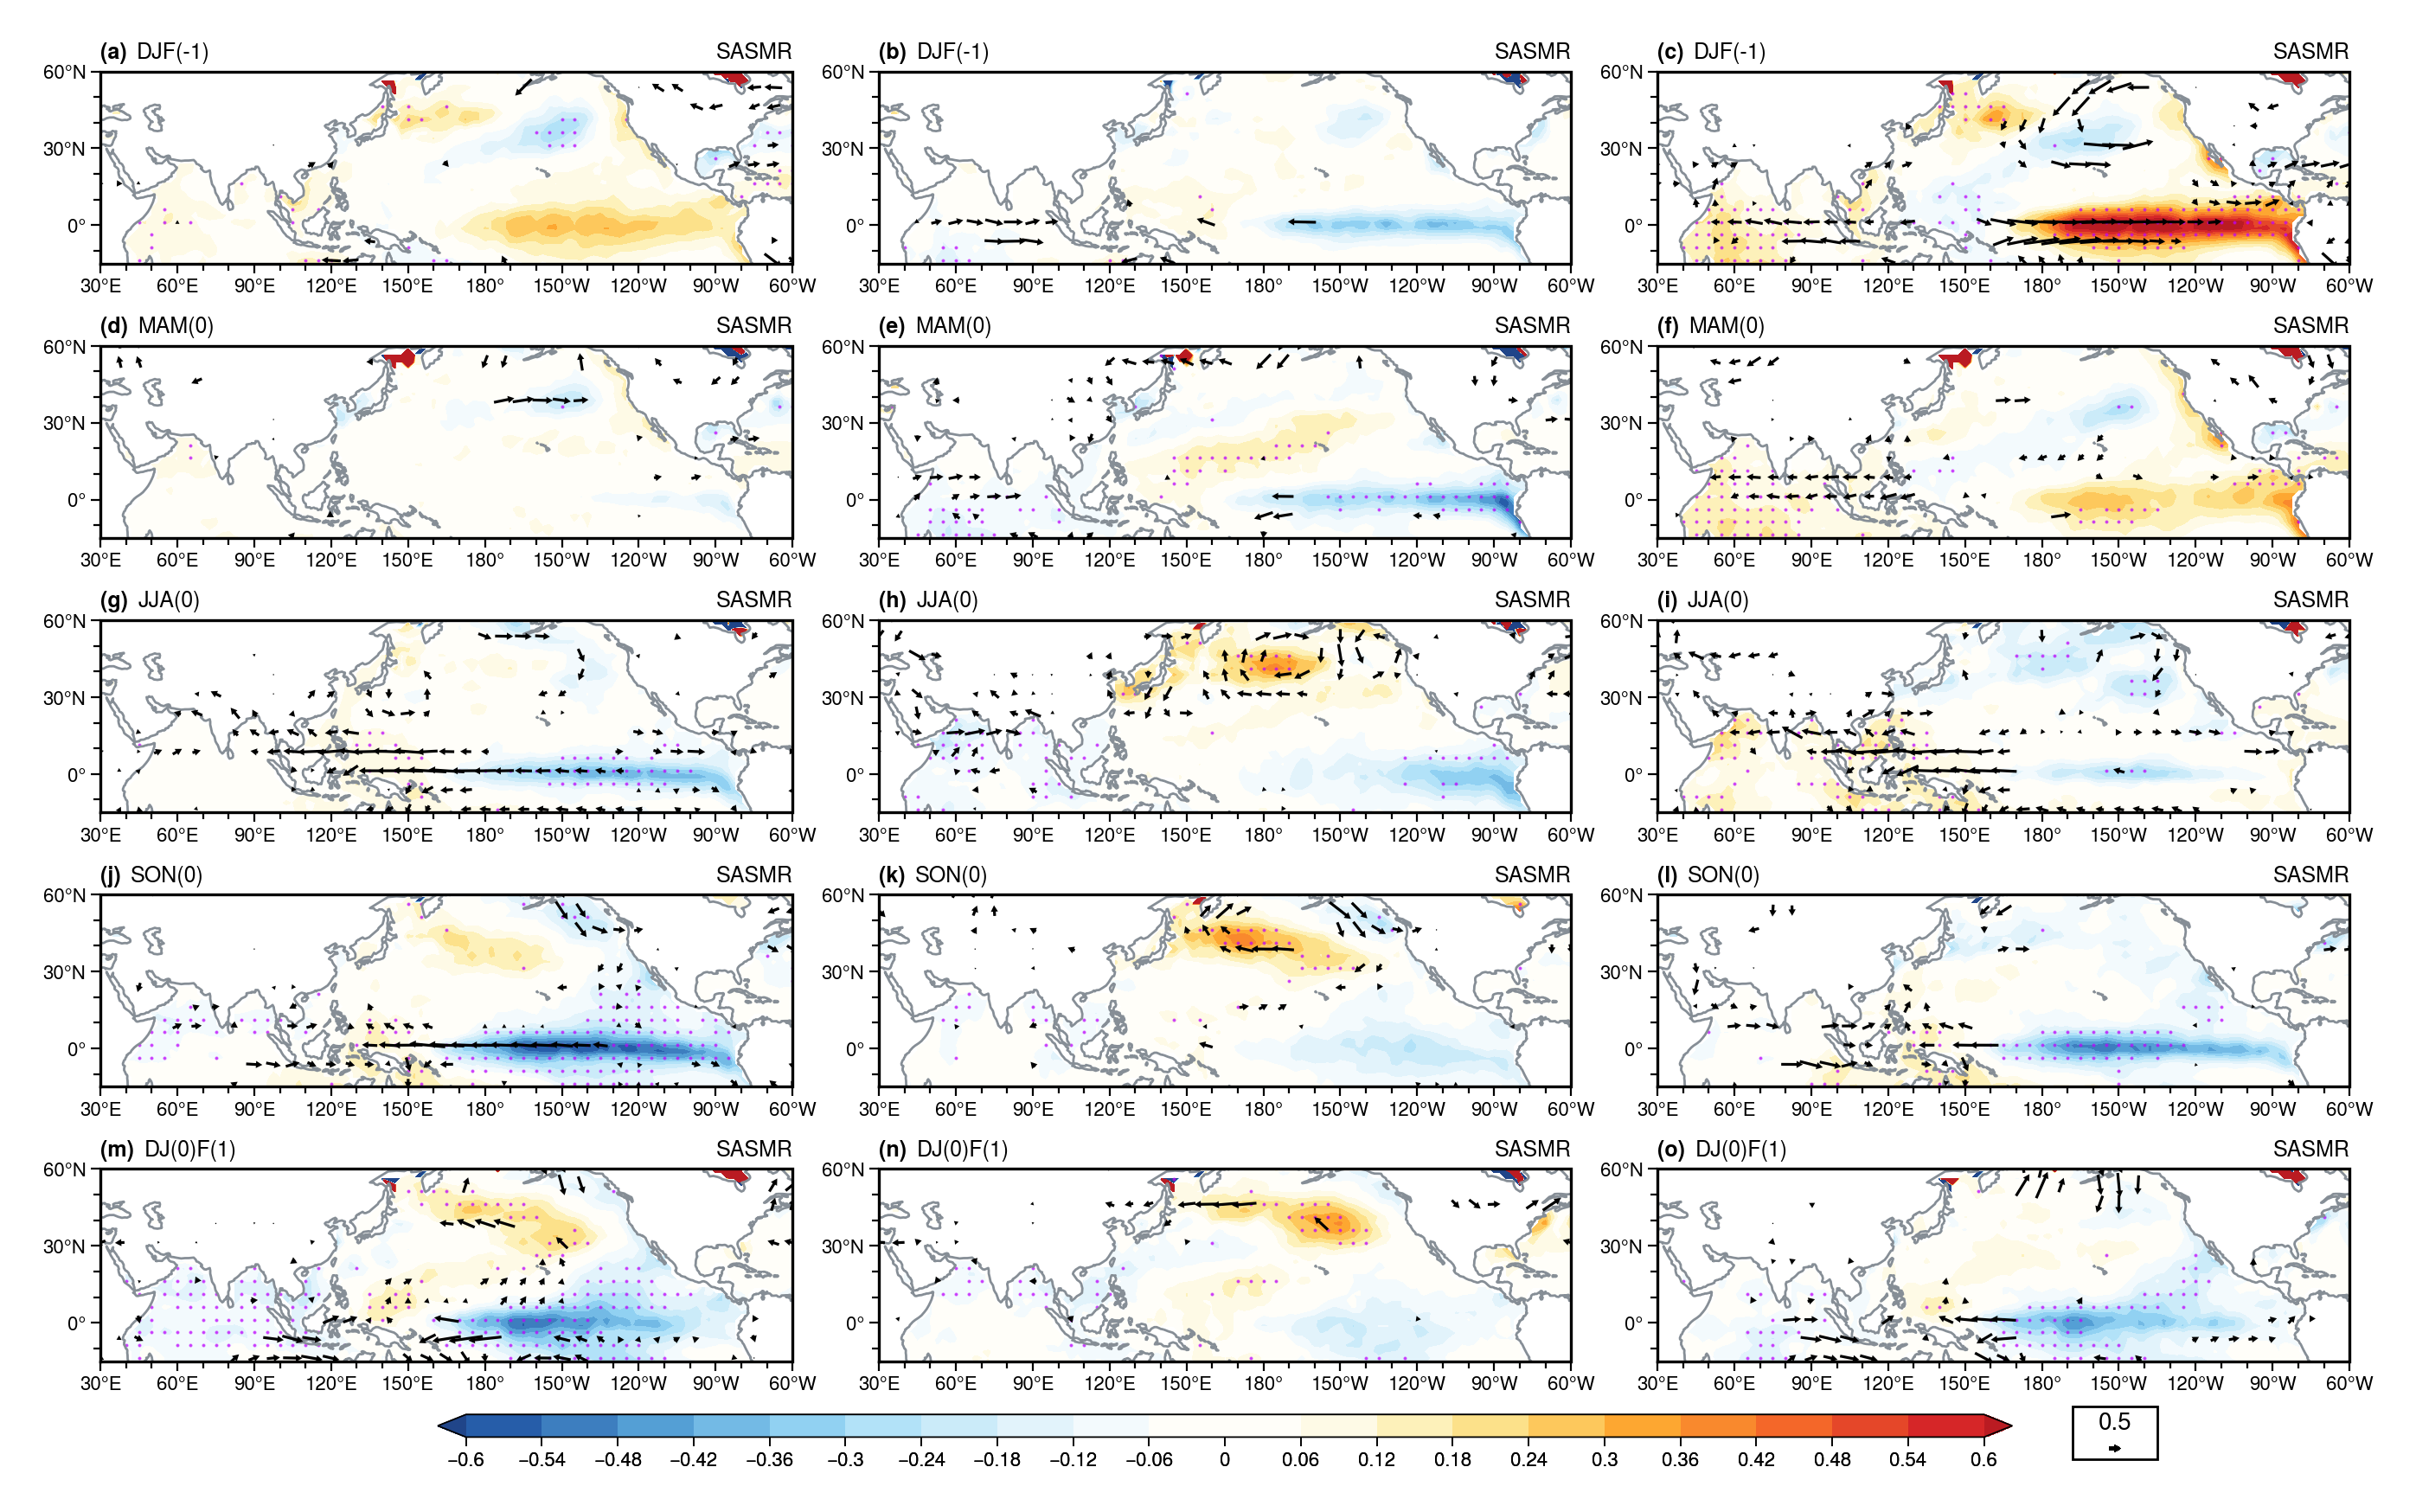

In [64]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
scalelevel=0.11
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sst_obs = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sst_obs.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 3
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue, u_slope, v_slope, wind_mask in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ERA5_sstDJF_slope, 
        IndR_ERA5_sstMAM_slope, 
        IndR_ERA5_sstJJA_slope, 
        IndR_ERA5_sstSON_slope, 
        IndR_ERA5_sstnDJF_slope], 
      [IndR_ERA5_sstDJF_pvalue, 
        IndR_ERA5_sstMAM_pvalue, 
        IndR_ERA5_sstJJA_pvalue, 
        IndR_ERA5_sstSON_pvalue, 
        IndR_ERA5_sstnDJF_pvalue],
      [IndR_ERA5_uDJF_slope, 
        IndR_ERA5_uMAM_slope, 
        IndR_ERA5_uJJA_slope, 
        IndR_ERA5_uSON_slope, 
        IndR_ERA5_unDJF_slope],
      [IndR_ERA5_vDJF_slope, 
        IndR_ERA5_vMAM_slope, 
        IndR_ERA5_vJJA_slope, 
        IndR_ERA5_vSON_slope, 
        IndR_ERA5_vnDJF_slope],
      [IndR_ERA5_windDJF_mask, 
        IndR_ERA5_windMAM_mask, 
        IndR_ERA5_windJJA_mask, 
        IndR_ERA5_windSON_mask, 
        IndR_ERA5_windnDJF_mask]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )
  
  m = axs[i, 0].quiver(
    u_slope.sel(level=850.0).where(wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
    v_slope.sel(level=850.0).where(wind_mask.sel(level=850.0) > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel,
    pivot="mid",
    color="black",
  )

  axs[i, 0].format(
      ltitle="{}".format(season), rtitle="SASMR",
  )
for num_area, area in enumerate(["northern SASMR", "southern SASMR"]):
  for (i, season), plot_slope, plot_pvalue, u_slope, v_slope, wind_mask in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
        [sstDJF_north_south_slope, 
          sstMAM_north_south_slope, 
          sstJJA_north_south_slope, 
          sstSON_north_south_slope, 
          sstnDJF_north_south_slope], 
        [sstDJF_north_south_pvalue, 
          sstMAM_north_south_pvalue, 
          sstJJA_north_south_pvalue, 
          sstSON_north_south_pvalue, 
          sstnDJF_north_south_pvalue],
        [uDJF_north_south_slope, 
          uMAM_north_south_slope, 
          uJJA_north_south_slope, 
          uSON_north_south_slope, 
          unDJF_north_south_slope],
        [vDJF_north_south_slope, 
          vMAM_north_south_slope, 
          vJJA_north_south_slope, 
          vSON_north_south_slope, 
          vnDJF_north_south_slope],
        [windDJF_north_south_mask, 
          windMAM_north_south_mask, 
          windJJA_north_south_mask, 
          windSON_north_south_mask, 
          windnDJF_north_south_mask]):
    con = axs[i, num_area+1].contourf(
        plot_slope[num_area],
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        plot_slope[num_area], axs[i, num_area+1], n, np.where(plot_pvalue[num_area][::n, ::n] <= 0.05), "bright purple", 3.0,
    )
    m = axs[i, num_area+1].quiver(
      u_slope.sel(level=850.0).where(wind_mask.sel(level=850.0) > 0.0)[num_area, ::ski, ::ski],
      v_slope.sel(level=850.0).where(wind_mask.sel(level=850.0) > 0.0)[num_area, ::ski, ::ski],
      zorder=1.1,
      headwidth=2.6,
      headlength=2.3,
      headaxislength=2.3,
      minlength=0.5,
      width=0.004,
      scale_units="xy",
      scale=scalelevel,
      pivot="mid",
      color="black",
    )
    axs[i, num_area+1].format(
        ltitle="{}".format(season), rtitle="SASMR",
    )
# ======================================
cb = fig_sst_obs.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cborientation = cb.ax.get_position(original=True)
cbx, cby, cbw, cbh = cborientation.x0, cborientation.y0, cborientation.width, cborientation.height
rectx0 = cbx+cbw+0.004
recty0 = 0.035
rectw = 0.035
recth = 0.035
rect = Rectangle((rectx0, recty0), rectw, recth, transform=fig_sst_obs.transFigure, fc="white", ec="k", lw=1.0, zorder=1.1)
fig_sst_obs.add_artist(rect)
qk = plt.quiverkey(
    m, X=rectx0+0.5*rectw, Y=recty0+recth*0.2, U=0.5, label="0.5", labelpos="N", labelsep=0.08, fontproperties={"size": 10}, zorder=3.1, coordinates="figure"
)
fig_sst_obs.add_artist(qk)
# length, width, ctmp = fig_sst_obs.shape
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# # ======================================
# con = axs[3].contourf(
#     IndR_diff_sst_slope_gens,
#     cmap="ColdHot",
#     cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
#     levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
#     zorder=0.8,
#     extend="both"
# )
# sepl.plt_sig(
#     IndR_diff_sst_slope_gens, axs[3], n, np.where(IndR_diff_sst_slope_gens_mask[::n, ::n] > 0.00), "bright purple", 3.0,
# )
# axs[3].format(
#     ltitle="diff", rtitle="gMME",
# )
# cb = axs[3].colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(-1.0,1.1,0.4))
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sst_obs.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

## 读取回归计算得到的数据（CRU）

In [ ]:
nIndR_CRU_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_CRU_pre_regress.nc")
nIndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_hgt_regress.nc")
nIndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_u_regress.nc")
nIndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_v_regress.nc")
nIndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_wDJF_regress.nc")
nIndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_wMAM_regress.nc")
nIndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_wJJA_regress.nc")
nIndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_wSON_regress.nc")
nIndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_wnDJF_regress.nc")
nIndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_div_regress.nc")

sIndR_CRU_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_CRU_pre_regress.nc")
sIndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_hgt_regress.nc")
sIndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_u_regress.nc")
sIndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_v_regress.nc")
sIndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_wDJF_regress.nc")
sIndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_wMAM_regress.nc")
sIndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_wJJA_regress.nc")
sIndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_wSON_regress.nc")
sIndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_wnDJF_regress.nc")
sIndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_div_regress.nc")

nIndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_sstDJF_regress.nc")
nIndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_sstMAM_regress.nc")
nIndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_sstJJA_regress.nc")
nIndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_sstSON_regress.nc")
nIndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_sstnDJF_regress.nc")

sIndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_sstDJF_regress.nc")
sIndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_sstMAM_regress.nc")
sIndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_sstJJA_regress.nc")
sIndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_sstSON_regress.nc")
sIndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_sstnDJF_regress.nc")

nIndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_uq_regress.nc")
nIndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_vq_regress.nc")
nIndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/NSASMR_reg_result/CRU/detrend/nIndR_ERA5_uqvqdiv_regress.nc")

sIndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_uq_regress.nc")
sIndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_vq_regress.nc")
sIndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SSASMR_reg_result/CRU/detrend/sIndR_ERA5_uqvqdiv_regress.nc")

IndR_CRU_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_CRU_pre_regress.nc")
IndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_hgt_regress.nc")
IndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_u_regress.nc")
IndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_v_regress.nc")
IndR_ERA5_wDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_wDJF_regress.nc")
IndR_ERA5_wMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_wMAM_regress.nc")
IndR_ERA5_wJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_wJJA_regress.nc")
IndR_ERA5_wSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_wSON_regress.nc")
IndR_ERA5_wnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_wnDJF_regress.nc")
IndR_ERA5_div_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_div_regress.nc")

IndR_ERA5_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_sstDJF_regress.nc")
IndR_ERA5_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_sstMAM_regress.nc")
IndR_ERA5_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_sstJJA_regress.nc")
IndR_ERA5_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_sstSON_regress.nc")
IndR_ERA5_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_sstnDJF_regress.nc")

IndR_ERA5_uq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_uq_regress.nc")
IndR_ERA5_vq_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_vq_regress.nc")
IndR_ERA5_uqvqdiv_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CRU/detrend/IndR_ERA5_uqvqdiv_regress.nc")

In [ ]:
nIndR_CRU_pre_slope = nIndR_CRU_pre_regress["slope"]
nIndR_CRU_pre_rvalue = nIndR_CRU_pre_regress["rvalue"]
nIndR_CRU_pre_pvalue = nIndR_CRU_pre_regress["pvalue"]

nIndR_ERA5_hgt_slope = nIndR_ERA5_hgt_regress["slope"]
nIndR_ERA5_hgt_rvalue = nIndR_ERA5_hgt_regress["rvalue"]
nIndR_ERA5_hgt_pvalue = nIndR_ERA5_hgt_regress["pvalue"]

nIndR_ERA5_u_slope = nIndR_ERA5_u_regress["slope"]
nIndR_ERA5_u_rvalue = nIndR_ERA5_u_regress["rvalue"]
nIndR_ERA5_u_pvalue = nIndR_ERA5_u_regress["pvalue"]

nIndR_ERA5_v_slope = nIndR_ERA5_v_regress["slope"]
nIndR_ERA5_v_rvalue = nIndR_ERA5_v_regress["rvalue"]
nIndR_ERA5_v_pvalue = nIndR_ERA5_v_regress["pvalue"]

nIndR_ERA5_wDJF_slope = nIndR_ERA5_wDJF_regress["slope"]
nIndR_ERA5_wDJF_rvalue = nIndR_ERA5_wDJF_regress["rvalue"]
nIndR_ERA5_wDJF_pvalue = nIndR_ERA5_wDJF_regress["pvalue"]

nIndR_ERA5_wMAM_slope = nIndR_ERA5_wMAM_regress["slope"]
nIndR_ERA5_wMAM_rvalue = nIndR_ERA5_wMAM_regress["rvalue"]
nIndR_ERA5_wMAM_pvalue = nIndR_ERA5_wMAM_regress["pvalue"]

nIndR_ERA5_wJJA_slope = nIndR_ERA5_wJJA_regress["slope"]
nIndR_ERA5_wJJA_rvalue = nIndR_ERA5_wJJA_regress["rvalue"]
nIndR_ERA5_wJJA_pvalue = nIndR_ERA5_wJJA_regress["pvalue"]

nIndR_ERA5_wSON_slope = nIndR_ERA5_wSON_regress["slope"]
nIndR_ERA5_wSON_rvalue = nIndR_ERA5_wSON_regress["rvalue"]
nIndR_ERA5_wSON_pvalue = nIndR_ERA5_wSON_regress["pvalue"]

nIndR_ERA5_wnDJF_slope = nIndR_ERA5_wnDJF_regress["slope"]
nIndR_ERA5_wnDJF_rvalue = nIndR_ERA5_wnDJF_regress["rvalue"]
nIndR_ERA5_wnDJF_pvalue = nIndR_ERA5_wnDJF_regress["pvalue"]

nIndR_ERA5_div_slope = nIndR_ERA5_div_regress["slope"]
nIndR_ERA5_div_rvalue = nIndR_ERA5_div_regress["rvalue"]
nIndR_ERA5_div_pvalue = nIndR_ERA5_div_regress["pvalue"]

nIndR_ERA5_sstDJF_slope = nIndR_ERA5_sstDJF_regress["slope"]
nIndR_ERA5_sstDJF_rvalue = nIndR_ERA5_sstDJF_regress["rvalue"]
nIndR_ERA5_sstDJF_pvalue = nIndR_ERA5_sstDJF_regress["pvalue"]

nIndR_ERA5_sstMAM_slope = nIndR_ERA5_sstMAM_regress["slope"]
nIndR_ERA5_sstMAM_rvalue = nIndR_ERA5_sstMAM_regress["rvalue"]
nIndR_ERA5_sstMAM_pvalue = nIndR_ERA5_sstMAM_regress["pvalue"]

nIndR_ERA5_sstJJA_slope = nIndR_ERA5_sstJJA_regress["slope"]
nIndR_ERA5_sstJJA_rvalue = nIndR_ERA5_sstJJA_regress["rvalue"]
nIndR_ERA5_sstJJA_pvalue = nIndR_ERA5_sstJJA_regress["pvalue"]

nIndR_ERA5_sstSON_slope = nIndR_ERA5_sstSON_regress["slope"]
nIndR_ERA5_sstSON_rvalue = nIndR_ERA5_sstSON_regress["rvalue"]
nIndR_ERA5_sstSON_pvalue = nIndR_ERA5_sstSON_regress["pvalue"]

nIndR_ERA5_sstnDJF_slope = nIndR_ERA5_sstnDJF_regress["slope"]
nIndR_ERA5_sstnDJF_rvalue = nIndR_ERA5_sstnDJF_regress["rvalue"]
nIndR_ERA5_sstnDJF_pvalue = nIndR_ERA5_sstnDJF_regress["pvalue"]

nIndR_ERA5_uq_slope = nIndR_ERA5_uq_regress["slope"]
nIndR_ERA5_uq_rvalue = nIndR_ERA5_uq_regress["rvalue"]
nIndR_ERA5_uq_pvalue = nIndR_ERA5_uq_regress["pvalue"]

nIndR_ERA5_vq_slope = nIndR_ERA5_vq_regress["slope"]
nIndR_ERA5_vq_rvalue = nIndR_ERA5_vq_regress["rvalue"]
nIndR_ERA5_vq_pvalue = nIndR_ERA5_vq_regress["pvalue"]

nIndR_ERA5_uqvqdiv_slope = nIndR_ERA5_uqvqdiv_regress["slope"]
nIndR_ERA5_uqvqdiv_rvalue = nIndR_ERA5_uqvqdiv_regress["rvalue"]
nIndR_ERA5_uqvqdiv_pvalue = nIndR_ERA5_uqvqdiv_regress["pvalue"]

In [ ]:
sIndR_CRU_pre_slope = sIndR_CRU_pre_regress["slope"]
sIndR_CRU_pre_rvalue = sIndR_CRU_pre_regress["rvalue"]
sIndR_CRU_pre_pvalue = sIndR_CRU_pre_regress["pvalue"]

sIndR_ERA5_hgt_slope = sIndR_ERA5_hgt_regress["slope"]
sIndR_ERA5_hgt_rvalue = sIndR_ERA5_hgt_regress["rvalue"]
sIndR_ERA5_hgt_pvalue = sIndR_ERA5_hgt_regress["pvalue"]

sIndR_ERA5_u_slope = sIndR_ERA5_u_regress["slope"]
sIndR_ERA5_u_rvalue = sIndR_ERA5_u_regress["rvalue"]
sIndR_ERA5_u_pvalue = sIndR_ERA5_u_regress["pvalue"]

sIndR_ERA5_v_slope = sIndR_ERA5_v_regress["slope"]
sIndR_ERA5_v_rvalue = sIndR_ERA5_v_regress["rvalue"]
sIndR_ERA5_v_pvalue = sIndR_ERA5_v_regress["pvalue"]

sIndR_ERA5_wDJF_slope = sIndR_ERA5_wDJF_regress["slope"]
sIndR_ERA5_wDJF_rvalue = sIndR_ERA5_wDJF_regress["rvalue"]
sIndR_ERA5_wDJF_pvalue = sIndR_ERA5_wDJF_regress["pvalue"]

sIndR_ERA5_wMAM_slope = sIndR_ERA5_wMAM_regress["slope"]
sIndR_ERA5_wMAM_rvalue = sIndR_ERA5_wMAM_regress["rvalue"]
sIndR_ERA5_wMAM_pvalue = sIndR_ERA5_wMAM_regress["pvalue"]

sIndR_ERA5_wJJA_slope = sIndR_ERA5_wJJA_regress["slope"]
sIndR_ERA5_wJJA_rvalue = sIndR_ERA5_wJJA_regress["rvalue"]
sIndR_ERA5_wJJA_pvalue = sIndR_ERA5_wJJA_regress["pvalue"]

sIndR_ERA5_wSON_slope = sIndR_ERA5_wSON_regress["slope"]
sIndR_ERA5_wSON_rvalue = sIndR_ERA5_wSON_regress["rvalue"]
sIndR_ERA5_wSON_pvalue = sIndR_ERA5_wSON_regress["pvalue"]

sIndR_ERA5_wnDJF_slope = sIndR_ERA5_wnDJF_regress["slope"]
sIndR_ERA5_wnDJF_rvalue = sIndR_ERA5_wnDJF_regress["rvalue"]
sIndR_ERA5_wnDJF_pvalue = sIndR_ERA5_wnDJF_regress["pvalue"]

sIndR_ERA5_div_slope = sIndR_ERA5_div_regress["slope"]
sIndR_ERA5_div_rvalue = sIndR_ERA5_div_regress["rvalue"]
sIndR_ERA5_div_pvalue = sIndR_ERA5_div_regress["pvalue"]

sIndR_ERA5_sstDJF_slope = sIndR_ERA5_sstDJF_regress["slope"]
sIndR_ERA5_sstDJF_rvalue = sIndR_ERA5_sstDJF_regress["rvalue"]
sIndR_ERA5_sstDJF_pvalue = sIndR_ERA5_sstDJF_regress["pvalue"]

sIndR_ERA5_sstMAM_slope = sIndR_ERA5_sstMAM_regress["slope"]
sIndR_ERA5_sstMAM_rvalue = sIndR_ERA5_sstMAM_regress["rvalue"]
sIndR_ERA5_sstMAM_pvalue = sIndR_ERA5_sstMAM_regress["pvalue"]

sIndR_ERA5_sstJJA_slope = sIndR_ERA5_sstJJA_regress["slope"]
sIndR_ERA5_sstJJA_rvalue = sIndR_ERA5_sstJJA_regress["rvalue"]
sIndR_ERA5_sstJJA_pvalue = sIndR_ERA5_sstJJA_regress["pvalue"]

sIndR_ERA5_sstSON_slope = sIndR_ERA5_sstSON_regress["slope"]
sIndR_ERA5_sstSON_rvalue = sIndR_ERA5_sstSON_regress["rvalue"]
sIndR_ERA5_sstSON_pvalue = sIndR_ERA5_sstSON_regress["pvalue"]

sIndR_ERA5_sstnDJF_slope = sIndR_ERA5_sstnDJF_regress["slope"]
sIndR_ERA5_sstnDJF_rvalue = sIndR_ERA5_sstnDJF_regress["rvalue"]
sIndR_ERA5_sstnDJF_pvalue = sIndR_ERA5_sstnDJF_regress["pvalue"]

sIndR_ERA5_uq_slope = sIndR_ERA5_uq_regress["slope"]
sIndR_ERA5_uq_rvalue = sIndR_ERA5_uq_regress["rvalue"]
sIndR_ERA5_uq_pvalue = sIndR_ERA5_uq_regress["pvalue"]

sIndR_ERA5_vq_slope = sIndR_ERA5_vq_regress["slope"]
sIndR_ERA5_vq_rvalue = sIndR_ERA5_vq_regress["rvalue"]
sIndR_ERA5_vq_pvalue = sIndR_ERA5_vq_regress["pvalue"]

sIndR_ERA5_uqvqdiv_slope = sIndR_ERA5_uqvqdiv_regress["slope"]
sIndR_ERA5_uqvqdiv_rvalue = sIndR_ERA5_uqvqdiv_regress["rvalue"]
sIndR_ERA5_uqvqdiv_pvalue = sIndR_ERA5_uqvqdiv_regress["pvalue"]

In [ ]:
IndR_GPCP_pre_slope = IndR_GPCP_pre_regress["slope"]
IndR_GPCP_pre_rvalue = IndR_GPCP_pre_regress["rvalue"]
IndR_GPCP_pre_pvalue = IndR_GPCP_pre_regress["pvalue"]

IndR_ERA5_hgt_slope = IndR_ERA5_hgt_regress["slope"]
IndR_ERA5_hgt_rvalue = IndR_ERA5_hgt_regress["rvalue"]
IndR_ERA5_hgt_pvalue = IndR_ERA5_hgt_regress["pvalue"]

IndR_ERA5_u_slope = IndR_ERA5_u_regress["slope"]
IndR_ERA5_u_rvalue = IndR_ERA5_u_regress["rvalue"]
IndR_ERA5_u_pvalue = IndR_ERA5_u_regress["pvalue"]

IndR_ERA5_v_slope = IndR_ERA5_v_regress["slope"]
IndR_ERA5_v_rvalue = IndR_ERA5_v_regress["rvalue"]
IndR_ERA5_v_pvalue = IndR_ERA5_v_regress["pvalue"]

IndR_ERA5_wDJF_slope = IndR_ERA5_wDJF_regress["slope"]
IndR_ERA5_wDJF_rvalue = IndR_ERA5_wDJF_regress["rvalue"]
IndR_ERA5_wDJF_pvalue = IndR_ERA5_wDJF_regress["pvalue"]

IndR_ERA5_wMAM_slope = IndR_ERA5_wMAM_regress["slope"]
IndR_ERA5_wMAM_rvalue = IndR_ERA5_wMAM_regress["rvalue"]
IndR_ERA5_wMAM_pvalue = IndR_ERA5_wMAM_regress["pvalue"]

IndR_ERA5_wJJA_slope = IndR_ERA5_wJJA_regress["slope"]
IndR_ERA5_wJJA_rvalue = IndR_ERA5_wJJA_regress["rvalue"]
IndR_ERA5_wJJA_pvalue = IndR_ERA5_wJJA_regress["pvalue"]

IndR_ERA5_wSON_slope = IndR_ERA5_wSON_regress["slope"]
IndR_ERA5_wSON_rvalue = IndR_ERA5_wSON_regress["rvalue"]
IndR_ERA5_wSON_pvalue = IndR_ERA5_wSON_regress["pvalue"]

IndR_ERA5_wnDJF_slope = IndR_ERA5_wnDJF_regress["slope"]
IndR_ERA5_wnDJF_rvalue = IndR_ERA5_wnDJF_regress["rvalue"]
IndR_ERA5_wnDJF_pvalue = IndR_ERA5_wnDJF_regress["pvalue"]

IndR_ERA5_div_slope = IndR_ERA5_div_regress["slope"]
IndR_ERA5_div_rvalue = IndR_ERA5_div_regress["rvalue"]
IndR_ERA5_div_pvalue = IndR_ERA5_div_regress["pvalue"]

IndR_ERA5_sstDJF_slope = IndR_ERA5_sstDJF_regress["slope"]
IndR_ERA5_sstDJF_rvalue = IndR_ERA5_sstDJF_regress["rvalue"]
IndR_ERA5_sstDJF_pvalue = IndR_ERA5_sstDJF_regress["pvalue"]

IndR_ERA5_sstMAM_slope = IndR_ERA5_sstMAM_regress["slope"]
IndR_ERA5_sstMAM_rvalue = IndR_ERA5_sstMAM_regress["rvalue"]
IndR_ERA5_sstMAM_pvalue = IndR_ERA5_sstMAM_regress["pvalue"]

IndR_ERA5_sstJJA_slope = IndR_ERA5_sstJJA_regress["slope"]
IndR_ERA5_sstJJA_rvalue = IndR_ERA5_sstJJA_regress["rvalue"]
IndR_ERA5_sstJJA_pvalue = IndR_ERA5_sstJJA_regress["pvalue"]

IndR_ERA5_sstSON_slope = IndR_ERA5_sstSON_regress["slope"]
IndR_ERA5_sstSON_rvalue = IndR_ERA5_sstSON_regress["rvalue"]
IndR_ERA5_sstSON_pvalue = IndR_ERA5_sstSON_regress["pvalue"]

IndR_ERA5_sstnDJF_slope = IndR_ERA5_sstnDJF_regress["slope"]
IndR_ERA5_sstnDJF_rvalue = IndR_ERA5_sstnDJF_regress["rvalue"]
IndR_ERA5_sstnDJF_pvalue = IndR_ERA5_sstnDJF_regress["pvalue"]

IndR_ERA5_uq_slope = IndR_ERA5_uq_regress["slope"]
IndR_ERA5_uq_rvalue = IndR_ERA5_uq_regress["rvalue"]
IndR_ERA5_uq_pvalue = IndR_ERA5_uq_regress["pvalue"]

IndR_ERA5_vq_slope = IndR_ERA5_vq_regress["slope"]
IndR_ERA5_vq_rvalue = IndR_ERA5_vq_regress["rvalue"]
IndR_ERA5_vq_pvalue = IndR_ERA5_vq_regress["pvalue"]

IndR_ERA5_uqvqdiv_slope = IndR_ERA5_uqvqdiv_regress["slope"]
IndR_ERA5_uqvqdiv_rvalue = IndR_ERA5_uqvqdiv_regress["rvalue"]
IndR_ERA5_uqvqdiv_pvalue = IndR_ERA5_uqvqdiv_regress["pvalue"]

In [ ]:
nIndR_ERA5_wind_mask = ca.wind_check(
    xr.where(nIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)
sIndR_ERA5_wind_mask = ca.wind_check(
    xr.where(sIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)
IndR_ERA5_wind_mask = ca.wind_check(
    xr.where(IndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_u_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_v_pvalue <= 0.05, 1.0, 0.0),
)

nIndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(nIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(nIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)
sIndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(sIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(sIndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)
IndR_ERA5_uqvq_mask = ca.wind_check(
    xr.where(IndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_uq_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_ERA5_vq_pvalue <= 0.05, 1.0, 0.0),
)

## 画图部分（CRU）

### Fig.1 降水

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_1 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 3
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_CRU_1.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 140.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
for ax in axs:
    # NC area
    x0 = NC_W
    y0 = NC_S
    width = NC_E-NC_W
    height = NC_N-NC_S
    sepl.patches(ax, x0 - cl, y0, width, height, proj, linewidth=1.2)
# ===================================================
# India
x0 = India_W
y0 = India_S
width = India_E-India_W
height = India_N-India_S
sepl.patches(axs[0], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[0].contourf(
    IndR_CRU_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_CRU_pre_slope, axs[0], n, np.where(IndR_CRU_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[0].format(
    ltitle="1979-2014", rtitle="SASMR",
)
# ===================================================
# northern India
x0 = nIndia_W
y0 = nIndia_S
width = nIndia_E-nIndia_W
height = nIndia_N-nIndia_S
sepl.patches(axs[1], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[1].contourf(
    nIndR_CRU_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    nIndR_CRU_pre_slope, axs[1], n, np.where(nIndR_CRU_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[1].format(
    ltitle="1979-2014", rtitle="northern SASMR",
)
# ===================================================
# southern India
x0 = sIndia_W
y0 = sIndia_S
width = sIndia_E-sIndia_W
height = sIndia_N-sIndia_S
sepl.patches(axs[2], x0 - cl, y0, width, height, proj, linestyle="-", linewidth=1.2)
con = axs[2].contourf(
    sIndR_CRU_pre_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both",
    )
sepl.plt_sig(
    sIndR_CRU_pre_slope, axs[2], n, np.where(sIndR_CRU_pre_pvalue[::n, ::n] < 0.10), "bright purple", 12.0,
)

axs[2].format(
    ltitle="1979-2014", rtitle="southern SASMR",
)
# ===================================================
cb = fig_CRU_1.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-2.0,2.1, 0.4))
axs.format(linewidth=1.2)
fig_CRU_1.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()

### Fig.2 位势高度、u、v

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-15, -8, -6]
spacinglevel=[1.5, 0.8, 0.6]
scalelevel=[0.30, 0.17, 0.14]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_2 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_CRU_2.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_ERA5_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_ERA5_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_ERA5_u_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_ERA5_v_slope.sel(level=lev).where(IndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="SASMR",
    )
    # ======================================
    con = axs[num_lev, 1].contourf(
        nIndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        nIndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 1], n, np.where(nIndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 1].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 1].quiver(
        nIndR_ERA5_u_slope.sel(level=lev).where(nIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        nIndR_ERA5_v_slope.sel(level=lev).where(nIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 1].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 1].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="northern SASMR",
    )
    # ======================================
    con = axs[num_lev, 2].contourf(
        sIndR_ERA5_hgt_slope.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        sIndR_ERA5_hgt_slope.sel(level=lev), axs[num_lev, 2], n, np.where(sIndR_ERA5_hgt_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 2].quiver(
    #     IndR_his_u_slope_ens.sel(level=lev)[::ski, ::ski],
    #     IndR_his_v_slope_ens.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 2].quiver(
        sIndR_ERA5_u_slope.sel(level=lev).where(sIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        sIndR_ERA5_v_slope.sel(level=lev).where(sIndR_ERA5_wind_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 2].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 2].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="southern SASMR",
    )
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_CRU_2.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### Fig. 3 高低层散度、omega

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-1e-6, -7e-3, -5e-7]
spacinglevel=[1.0e-7, 7e-4, 5e-8]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_3 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=5.2, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_CRU_3.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    # ======================================
    if lev == 200.0 or lev == 850.0:
      axs[num_lev, 0].contourf(
      IndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        IndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    if lev == 500.0:
      axs[num_lev, 0].contourf(
      IndR_ERA5_wJJA_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      extend="both"
      )  
      sepl.plt_sig(
          IndR_ERA5_wJJA_slope, axs[num_lev, 0], n, np.where(IndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 0].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="SASMR",
    )
	# ======================================
    if lev == 200.0 or lev == 850.0:
      con = axs[num_lev, 1].contourf(
      nIndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        nIndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 1], n, np.where(nIndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
      
    if lev == 500.0:
      con = axs[num_lev, 1].contourf(
      nIndR_ERA5_wJJA_slope,
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        nIndR_ERA5_wJJA_slope, axs[num_lev, 1], n, np.where(nIndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 1].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="northern SASMR",
    )
    # ======================================
    if lev == 200.0 or lev == 850.0:
      con = axs[num_lev, 2].contourf(
      sIndR_ERA5_div_slope.sel(level=lev),
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        sIndR_ERA5_div_slope.sel(level=lev), axs[num_lev, 2], n, np.where(sIndR_ERA5_div_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
      
    if lev == 500.0:
      con = axs[num_lev, 2].contourf(
      sIndR_ERA5_wJJA_slope,
      levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
      zorder=0.8,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      extend="both"
      )
      sepl.plt_sig(
        sIndR_ERA5_wJJA_slope, axs[num_lev, 2], n, np.where(sIndR_ERA5_wJJA_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
      )
    axs[num_lev, 2].format(
        ltitle="1979-2014 {:.0f} hPa".format(lev), rtitle="southern SASMR",
    )
    
    cb = axs[num_lev, 2].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=0.8)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.5, titlepad=8.0, rc_kw={"contour.negative_linestyle":"-"})
fig_CRU_3.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":16})
pplt.rc.reset()

### Fig. 4 垂直积分水汽通量、垂直积分水汽通量散度

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=[-2e-7]
spacinglevel=[2e-8]
scalelevel=[0.05]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_4 = pplt.figure(span=False, share=False, refwidth=6.0, wspace=4.2, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_CRU_4.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
# ======================================
con = axs[0].contourf(
    IndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    IndR_ERA5_uqvqdiv_slope, axs[0], n, np.where(IndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)
axs[0].quiver(
    IndR_ERA5_uq_slope[::ski, ::ski],
    IndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[0].quiver(
    IndR_ERA5_uq_slope.where(IndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    IndR_ERA5_vq_slope.where(IndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)


qk = axs[0].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[0].format(
    ltitle="1979-2014", rtitle="SASMR",
)
# ======================================
con = axs[1].contourf(
    nIndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    nIndR_ERA5_uqvqdiv_slope, axs[1], n, np.where(nIndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)

axs[1].quiver(
    nIndR_ERA5_uq_slope[::ski, ::ski],
    nIndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[1].quiver(
    nIndR_ERA5_uq_slope.where(nIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    nIndR_ERA5_vq_slope.where(nIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)

qk = axs[1].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[1].format(
    ltitle="1979-2014", rtitle="northern SASMR",
)
# ======================================
con = axs[2].contourf(
    sIndR_ERA5_uqvqdiv_slope,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]),
    zorder=0.8,
    extend="both"
)
sepl.plt_sig(
    sIndR_ERA5_uqvqdiv_slope, axs[2], n, np.where(sIndR_ERA5_uqvqdiv_pvalue[::n, ::n] <= 0.05), "bright purple", 19.0,
)

axs[2].quiver(
    sIndR_ERA5_uq_slope[::ski, ::ski],
    sIndR_ERA5_vq_slope[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="grey7",
)
m = axs[2].quiver(
    sIndR_ERA5_uq_slope.where(sIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    sIndR_ERA5_vq_slope.where(sIndR_ERA5_uqvq_mask > 0.0)[::ski, ::ski],
    zorder=1.1,
    headwidth=2.6,
    headlength=2.3,
    headaxislength=2.3,
    minlength=0.5,
    width=0.004,
    scale_units="xy",
    scale=scalelevel[0],
    pivot="mid",
    color="black",
)

qk = axs[2].quiverkey(
    m, X=1 - w / 2, Y=0.7 * h, U=0.3, label="0.3", labelpos="S", labelsep=0.10, fontproperties={"size":10}, zorder=3.1,
)
axs[2].format(
    ltitle="1979-2014", rtitle="southern SASMR",
)
cb = axs[2].colorbar(con, loc="b", width=0.17, length=0.8, label="", ticklabelsize=12, pad=1.8)
cb.set_ticks(np.arange(startlevel[0], -startlevel[0]+spacinglevel[0], spacinglevel[0]*2))
# ======================================
axs.format(linewidth=1.5, titlepad=8.0, rc_kw={"contour.negative_linestyle":"-"})
fig_CRU_4.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":16})
pplt.rc.reset()

### Fig. 5 海温

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-6e-1
spacinglevel=0.06
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_5 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_CRU_5.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ERA5_sstDJF_slope, 
        IndR_ERA5_sstMAM_slope, 
        IndR_ERA5_sstJJA_slope, 
        IndR_ERA5_sstSON_slope, 
        IndR_ERA5_sstnDJF_slope], 
      [IndR_ERA5_sstDJF_pvalue, 
        IndR_ERA5_sstMAM_pvalue, 
        IndR_ERA5_sstJJA_pvalue, 
        IndR_ERA5_sstSON_pvalue, 
        IndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="{}".format(season), rtitle="SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [nIndR_ERA5_sstDJF_slope, 
      nIndR_ERA5_sstMAM_slope, 
      nIndR_ERA5_sstJJA_slope, 
      nIndR_ERA5_sstSON_slope, 
      nIndR_ERA5_sstnDJF_slope], 
      [nIndR_ERA5_sstDJF_pvalue, 
      nIndR_ERA5_sstMAM_pvalue, 
      nIndR_ERA5_sstJJA_pvalue, 
      nIndR_ERA5_sstSON_pvalue, 
      nIndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 1].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 1], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 1].format(
      ltitle="{}".format(season), rtitle="northern SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sIndR_ERA5_sstDJF_slope, 
      sIndR_ERA5_sstMAM_slope, 
      sIndR_ERA5_sstJJA_slope, 
      sIndR_ERA5_sstSON_slope, 
      sIndR_ERA5_sstnDJF_slope], 
      [sIndR_ERA5_sstDJF_pvalue, 
      sIndR_ERA5_sstMAM_pvalue, 
      sIndR_ERA5_sstJJA_pvalue, 
      sIndR_ERA5_sstSON_pvalue, 
      sIndR_ERA5_sstnDJF_pvalue]):
  con = axs[i, 2].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 2], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 2].format(
      ltitle="{}".format(season), rtitle="southern SASMR",
  )
# ======================================
cb = fig_CRU_5.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# # ======================================
# con = axs[3].contourf(
#     IndR_diff_sst_slope_gens,
#     cmap="ColdHot",
#     cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
#     levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
#     zorder=0.8,
#     extend="both"
# )
# sepl.plt_sig(
#     IndR_diff_sst_slope_gens, axs[3], n, np.where(IndR_diff_sst_slope_gens_mask[::n, ::n] > 0.00), "bright purple", 3.0,
# )
# axs[3].format(
#     ltitle="diff", rtitle="gMME",
# )
# cb = axs[3].colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(-1.0,1.1,0.4))
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_CRU_5.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### Fig. 6 垂直速度

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-2e-2
spacinglevel=2e-3
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_CRU_6 = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 5
ncols = 3
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_CRU_6.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [IndR_ERA5_wDJF_slope, 
        IndR_ERA5_wMAM_slope, 
        IndR_ERA5_wJJA_slope, 
        IndR_ERA5_wSON_slope, 
        IndR_ERA5_wnDJF_slope], 
      [IndR_ERA5_wDJF_pvalue, 
        IndR_ERA5_wMAM_pvalue, 
        IndR_ERA5_wJJA_pvalue, 
        IndR_ERA5_wSON_pvalue, 
        IndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 0].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 0], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 0].format(
      ltitle="{}".format(season), rtitle="SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [nIndR_ERA5_wDJF_slope, 
      nIndR_ERA5_wMAM_slope, 
      nIndR_ERA5_wJJA_slope, 
      nIndR_ERA5_wSON_slope, 
      nIndR_ERA5_wnDJF_slope], 
      [nIndR_ERA5_wDJF_pvalue, 
      nIndR_ERA5_wMAM_pvalue, 
      nIndR_ERA5_wJJA_pvalue, 
      nIndR_ERA5_wSON_pvalue, 
      nIndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 1].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 1], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 1].format(
      ltitle="{}".format(season), rtitle="northern SASMR",
  )
# ======================================
for (i, season), plot_slope, plot_pvalue in zip(enumerate(["DJF(-1)", "MAM(0)", "JJA(0)", "SON(0)", "DJ(0)F(1)"]), 
      [sIndR_ERA5_wDJF_slope, 
      sIndR_ERA5_wMAM_slope, 
      sIndR_ERA5_wJJA_slope, 
      sIndR_ERA5_wSON_slope, 
      sIndR_ERA5_wnDJF_slope], 
      [sIndR_ERA5_wDJF_pvalue, 
      sIndR_ERA5_wMAM_pvalue, 
      sIndR_ERA5_wJJA_pvalue, 
      sIndR_ERA5_wSON_pvalue, 
      sIndR_ERA5_wnDJF_pvalue]):
  con = axs[i, 2].contourf(
      plot_slope,
      cmap="ColdHot",
      cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
      levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
      zorder=0.8,
      extend="both"
  )
  sepl.plt_sig(
      plot_slope, axs[i, 2], n, np.where(plot_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
  )

  axs[i, 2].format(
      ltitle="{}".format(season), rtitle="southern SASMR",
  )
# ======================================
cb = fig_CRU_6.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# # ======================================
# con = axs[3].contourf(
#     IndR_diff_w_slope_gens,
#     cmap="ColdHot",
#     cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
#     levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
#     zorder=0.8,
#     extend="both"
# )
# sepl.plt_sig(
#     IndR_diff_w_slope_gens, axs[3], n, np.where(IndR_diff_w_slope_gens_mask[::n, ::n] > 0.00), "bright purple", 3.0,
# )
# axs[3].format(
#     ltitle="diff", rtitle="gMME",
# )
# cb = axs[3].colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(-1.0,1.1,0.4))
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_CRU_6.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()